### Single cell analysis : from QC to cell type annotation

#### Dataset : PBMC from a healthy donor 10x Genomics
##### The raw fastq files : ttps://www.10xgenomics.com/datasets/3-k-pbm-cs-from-a-healthy-donor-1-standard-1-1-0

##### Prior to the analysis, the read were aligned to the human reference transcriptome using the following CellRanger command line: 
##### cellranger-10.0.0/bin/cellranger count --id cell_count_output_1 --transcriptome human_reference_genome/refdata-gex-GRCh38-2024-A/ --fastqs pbmc_unsorted_3k/gex/ --sample pbmc_unsorted_3k --chemistry ARC-v1 --create-bam false

##### My summary output is available here : https://github.com/ksenia-mozhaitseva/Single-cell-RNA-seq-with-Scanpy-3k-PBMCs-from-a-Healthy-Donor
##### Summary output from 10x Genomics : https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_unsorted_3k/pbmc_unsorted_3k_web_summary.html

#### Upload necessary packages

In [86]:
import scanpy as sc
import scrublet as scr
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Upload count matrix

In [87]:
adata = sc.read_10x_mtx("C:/Users/ksenia/single_cell_RNAseq_matrix", # read a folder form CellRanger output (matrix, features and barcodes)
                       var_names = "gene_symbols")
adata

AnnData object with n_obs × n_vars = 3011 × 38606
    var: 'gene_ids', 'feature_types'

In [88]:
adata.obs # barcodes

""
AAACAGCCAACAGGTG-1
AAACATGCAACAACAA-1
AAACCAACACAGCCTG-1
AAACCAACAGCAAGAT-1
AAACCAACATTGCGAC-1
...
TTTGTCTAGTCTATGA-1
TTTGTGGCAGCACGAA-1
TTTGTGGCATCGCTCC-1
TTTGTGTTCACTTCAT-1


In [89]:
adata.var # genes

,gene_ids,feature_types
DDX11L2,ENSG00000290825,Gene Expression
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
ENSG00000290826,ENSG00000290826,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
...,...,...
ENSG00000277836,ENSG00000277836,Gene Expression
ENSG00000278633,ENSG00000278633,Gene Expression
ENSG00000276017,ENSG00000276017,Gene Expression
ENSG00000278817,ENSG00000278817,Gene Expression


In [90]:
adata.X.shape # matrix dimentions (cells × genes) from the adata object

(3011, 38606)

#### Doublet removal
##### When two cells accidentally end up in the same droplet; this produces a mixed transcriptome; it can look like a weird hybrid cell type, which is false
##### Scrublet Doublet Detection
###### Scrublet detects doublets by first simulating synthetic doublets from pairs of real cells, then projecting both real and simulated cells into a low-dimensional space (PCA). Each real cell is scored based on the fraction of its nearest neighbors that are simulated doublets. A threshold is applied to these scores to classify cells as doublets, which are then removed to produce a clean adata_filtered dataset for downstream analysis such as normalization, PCA, clustering, and visualization.

In [91]:
# Prepare Scrublet
counts_matrix = adata.X.copy()  # cells x genes
scrub = scr.Scrublet(counts_matrix)

# Predict doublets
doublet_scores, predicted_doublets = scrub.scrub_doublets()

# Filter doublets
adata_filtered = adata[~predicted_doublets, :].copy()
print(adata_filtered.shape)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.34
Detected doublet rate = 2.7%
Estimated detectable doublet fraction = 54.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.0%
Elapsed time: 8.3 seconds
(2929, 38606)


#### Preprocessing

##### Mitochondrial genes

In [92]:
adata_filtered.var[adata_filtered.var.index.str.startswith('MT-')]

,gene_ids,feature_types
MT-ND1,ENSG00000198888,Gene Expression
MT-ND2,ENSG00000198763,Gene Expression
MT-CO1,ENSG00000198804,Gene Expression
MT-CO2,ENSG00000198712,Gene Expression
MT-ATP8,ENSG00000228253,Gene Expression
MT-ATP6,ENSG00000198899,Gene Expression
MT-CO3,ENSG00000198938,Gene Expression
MT-ND3,ENSG00000198840,Gene Expression
MT-ND4L,ENSG00000212907,Gene Expression
MT-ND4,ENSG00000198886,Gene Expression


In [93]:
print(adata.var.index.str.startswith('MT-').sum())  # How many mitochondrial genes were detected

13


In [94]:
adata_filtered.var['MT'] = adata_filtered.var.index.str.startswith('MT-') # add True/False when a gene is mitochondrial or not
adata_filtered.var

,gene_ids,feature_types,MT
DDX11L2,ENSG00000290825,Gene Expression,False
MIR1302-2HG,ENSG00000243485,Gene Expression,False
FAM138A,ENSG00000237613,Gene Expression,False
ENSG00000290826,ENSG00000290826,Gene Expression,False
OR4F5,ENSG00000186092,Gene Expression,False
...,...,...,...
ENSG00000277836,ENSG00000277836,Gene Expression,False
ENSG00000278633,ENSG00000278633,Gene Expression,False
ENSG00000276017,ENSG00000276017,Gene Expression,False
ENSG00000278817,ENSG00000278817,Gene Expression,False


##### Ribosomal genes

In [95]:
# Upload a GMT file with ribosomal genes' names (downloaded form Broad Institute)
gmt_file = "C:/Users/ksenia/KEGG_RIBOSOME.v2025.1.Hs.gmt"

# Read the GMT file line by line
gene_sets = []
with open(gmt_file) as f:
    for line in f:
        parts = line.strip().split("\t")  # GMT is tab-delimited
        gene_set_name = parts[0]
        description = parts[1]
        genes = parts[2:]  # remaining columns are gene symbols
        for g in genes:
            gene_sets.append([gene_set_name, description, g])

# Convert to DataFrame
df_ribo = pd.DataFrame(gene_sets, columns=['gene_set', 'description', 'gene'])
ribo_genes = df_ribo['gene'].unique().tolist()
print(f"Number of ribosomal genes: {len(ribo_genes)}")

Number of ribosomal genes: 88


In [96]:
print(ribo_genes)

['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12', 'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A', 'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24', 'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3', 'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36', 'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L', 'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9', 'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13', 'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2', 'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27', 'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X', 'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA', 'RSL24D1', 'RSL24D1P11', 'UBA52']


In [97]:
adata_filtered.var['Ribosomal'] = adata_filtered.var_names.isin(df_ribo['gene'].values) # add True/False when a gene is ribosomal or not
adata_filtered.var

,gene_ids,feature_types,MT,Ribosomal
DDX11L2,ENSG00000290825,Gene Expression,False,False
MIR1302-2HG,ENSG00000243485,Gene Expression,False,False
FAM138A,ENSG00000237613,Gene Expression,False,False
ENSG00000290826,ENSG00000290826,Gene Expression,False,False
OR4F5,ENSG00000186092,Gene Expression,False,False
...,...,...,...,...
ENSG00000277836,ENSG00000277836,Gene Expression,False,False
ENSG00000278633,ENSG00000278633,Gene Expression,False,False
ENSG00000276017,ENSG00000276017,Gene Expression,False,False
ENSG00000278817,ENSG00000278817,Gene Expression,False,False


##### QC metrics

###### n_genes_by_counts → number of genes detected in each cell; total_counts → total UMIs per cell; pct_counts_MT → % of reads from mitochondrial genes (usually < 5-20%); pct_counts_Ribosomal → % of reads from ribosomal genes (< 50%)

In [98]:
sc.pp.calculate_qc_metrics(
    adata_filtered,
    qc_vars=['MT','Ribosomal'],   # mt and ribo columns in adata.var
    percent_top=None,
    log1p=False,
    inplace=True
)
adata_filtered.obs.head() # QC cell

,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_Ribosomal,pct_counts_Ribosomal
AAACAGCCAACAGGTG-1,1015,1829.0,328.0,17.933296,111.0,6.068890
AAACATGCAACAACAA-1,1991,4076.0,325.0,7.973503,34.0,0.834151
AAACCAACACAGCCTG-1,886,1599.0,263.0,16.447779,81.0,5.065666
AAACCAACAGCAAGAT-1,987,1605.0,191.0,11.900311,94.0,5.856698
AAACCAACATTGCGAC-1,976,1731.0,268.0,15.482380,139.0,8.030041


In [99]:
adata_filtered.var.head() # QC genes

,gene_ids,feature_types,MT,Ribosomal,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
DDX11L2,ENSG00000290825,Gene Expression,False,False,0,0.0,100.0,0.0
MIR1302-2HG,ENSG00000243485,Gene Expression,False,False,0,0.0,100.0,0.0
FAM138A,ENSG00000237613,Gene Expression,False,False,0,0.0,100.0,0.0
ENSG00000290826,ENSG00000290826,Gene Expression,False,False,0,0.0,100.0,0.0
OR4F5,ENSG00000186092,Gene Expression,False,False,0,0.0,100.0,0.0


In [100]:
# Count genes with zero expression across all cells
num_genes_zero = (adata_filtered.var['n_cells_by_counts'] == 0).sum()
print(f"Number of genes with n_cells_by_counts = 0: {num_genes_zero}")

Number of genes with n_cells_by_counts = 0: 11517


###### About 30% of the genes with zero expression across all cells: 1) lowly expressed RNA (e.g. lncRNAs), 2) preudogenes, 3) genes not active in these cell types

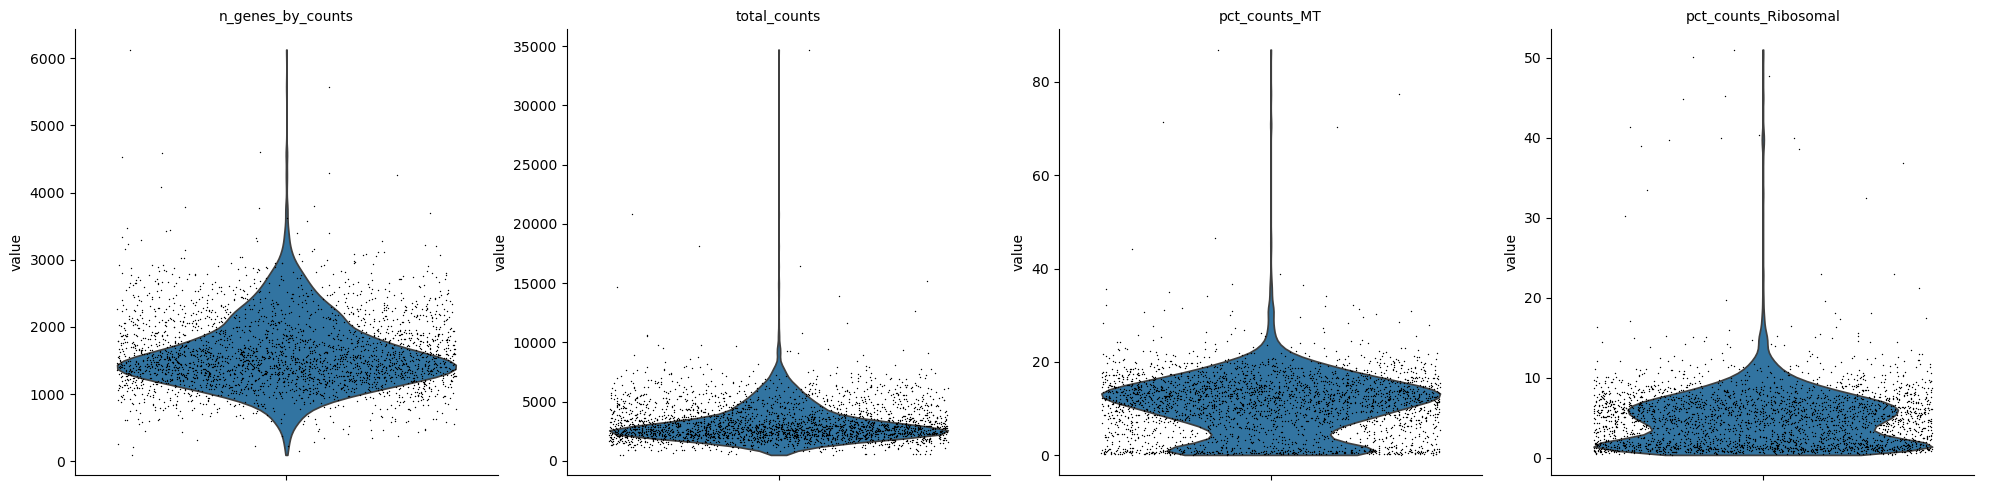

In [101]:
sc.pl.violin(adata_filtered, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT', 'pct_counts_Ribosomal'], jitter=0.4, multi_panel=True)

In [102]:
#Define the thresholds to filter the data
metrics = ['n_genes_by_counts', 'total_counts', 'pct_counts_MT', 'pct_counts_Ribosomal']

# Calculate upper (95th percentile) and lower (5th percentile) limits
upper_limits = {}
lower_limits = {}

for metric in metrics:
    upper_limits[metric] = np.percentile(adata_filtered.obs[metric], 99)
    lower_limits[metric] = np.percentile(adata_filtered.obs[metric], 1)
    print(f"{metric}: 1th percentile = {lower_limits[metric]:.2f}, 99th percentile = {upper_limits[metric]:.2f}")

n_genes_by_counts: 1th percentile = 581.84, 99th percentile = 3147.12
total_counts: 1th percentile = 878.56, 99th percentile = 8121.40
pct_counts_MT: 1th percentile = 0.25, 99th percentile = 27.93
pct_counts_Ribosomal: 1th percentile = 0.55, 99th percentile = 15.82


In [103]:
#Apply the thresholds
# QC thresholds based on your percentiles
lower_limits = {
    'n_genes_by_counts': 581.84,
    'total_counts': 878.56
}

upper_limits = {
    'n_genes_by_counts': 3147.12,
    'total_counts': 8121.40,
    'pct_counts_MT': 20, # arbitrary threshold for miochondria
    'pct_counts_Ribosomal': 15.82
}

# Create a boolean mask for filtering; True → keep the cell, False → filter out the cell
mask = (
    (adata_filtered.obs['n_genes_by_counts'] >= lower_limits['n_genes_by_counts']) &
    (adata_filtered.obs['n_genes_by_counts'] <= upper_limits['n_genes_by_counts']) &
    (adata_filtered.obs['total_counts'] >= lower_limits['total_counts']) &
    (adata_filtered.obs['total_counts'] <= upper_limits['total_counts']) &
    (adata_filtered.obs['pct_counts_MT'] <= upper_limits['pct_counts_MT']) &
    (adata_filtered.obs['pct_counts_Ribosomal'] <= upper_limits['pct_counts_Ribosomal'])
)

# Subset the AnnData object to create a new filtered object
adata_filtered_qc = adata_filtered[mask].copy()

# Print summary
print(f"Cells before QC filtering: {adata_filtered.n_obs}")
print(f"Cells after QC filtering: {adata_filtered_qc.n_obs}")

Cells before QC filtering: 2929
Cells after QC filtering: 2702


#### Normalization

In [104]:
adata_filtered_qc.X.sum(axis =1)

matrix([[1829.],
        [4076.],
        [1599.],
        ...,
        [2132.],
        [2157.],
        [5529.]], dtype=float32)

###### Total number of UMIs is different in the cells: 1) some cells are sequenced more deeply, 2) some cells capture more RNA molecules than others, 3) larger cells may have more transcripts

In [105]:
sc.pp.normalize_total(adata_filtered_qc, target_sum = 1e4) # normalize every cell to 10,000 UMI

In [106]:
adata_filtered_qc.X.sum(axis =1)

matrix([[10000.001],
        [10000.   ],
        [10000.   ],
        ...,
        [10000.   ],
        [10000.001],
        [10000.   ]], dtype=float32)

In [107]:
sc.pp.log1p(adata_filtered_qc) # change to log count to avoid very large ranges

In [108]:
adata_filtered_qc.X.sum(axis =1)

matrix([[2112.3352],
        [3102.6204],
        [1961.3658],
        ...,
        [2375.9883],
        [2622.2942],
        [3310.9502]], dtype=float32)

In [109]:
# Store raw log-normalized data (before scaling / regress_out)
adata_filtered_qc_hvg.raw = adata_filtered_qc_hvg

#### Correction for cell cycle

###### Cell cycle correction removes the effects of genes involved in S phase and G2/M phase, which can introduce systematic variation unrelated to cell identity. By regressing out these scores, along with cell-level covariates like total counts and mitochondrial fraction, we correct for technical and cell cycle–driven effects while preserving true biological signals.

In [110]:
# Cell cycle gene lists
from scanpy.tl import score_genes_cell_cycle

# Upload standard lists from Tirosh et al.
# S phase genes
s_genes = [
    "MCM5","PCNA","TYMS","FEN1","MCM2","MCM4","RRM1","UNG","GINS2",
    "MCM6","CDCA7","DTL","PRIM1","UHRF1","HELLS","RFC2","RPA2","NASP",
    "RAD51AP1","GMNN","WDR76","SLBP","CCNE2","UBR7","POLD3","MSH2",
    "ATAD2","RAD51","RRM2","CDC45","CDC6","EXO1","TIPIN","DSCC1","BLM",
    "CASP8AP2","USP1","CLSPN","POLA1","CHAF1B","BRIP1","E2F8"
]

# G2M phase genes
g2m_genes = [
    "HMGB2","CDK1","NUSAP1","UBE2C","BIRC5","TPX2","TOP2A","NDC80",
    "CKS2","NUF2","CKS1B","MKI67","TMPO","CENPF","TACC3","FAM64A",
    "SMC4","CCNB2","CKAP2L","CKAP2","AURKB","BUB1","KIF11","ANP32E",
    "TUBB4B","GTSE1","KIF20B","HJURP","CDCA3","HN1","CDC20","TTK",
    "CDC25C","KIF2C","RANGAP1","NCAPD2","DLGAP5","CDCA2","CDCA8",
    "ECT2","KIF23","HMMR","AURKA","PSRC1","ANLN","LBR","CKAP5","CENPE"
]

In [111]:
# Score cell cells
sc.tl.score_genes_cell_cycle(
    adata_filtered_qc,
    s_genes=s_genes,
    g2m_genes=g2m_genes
)

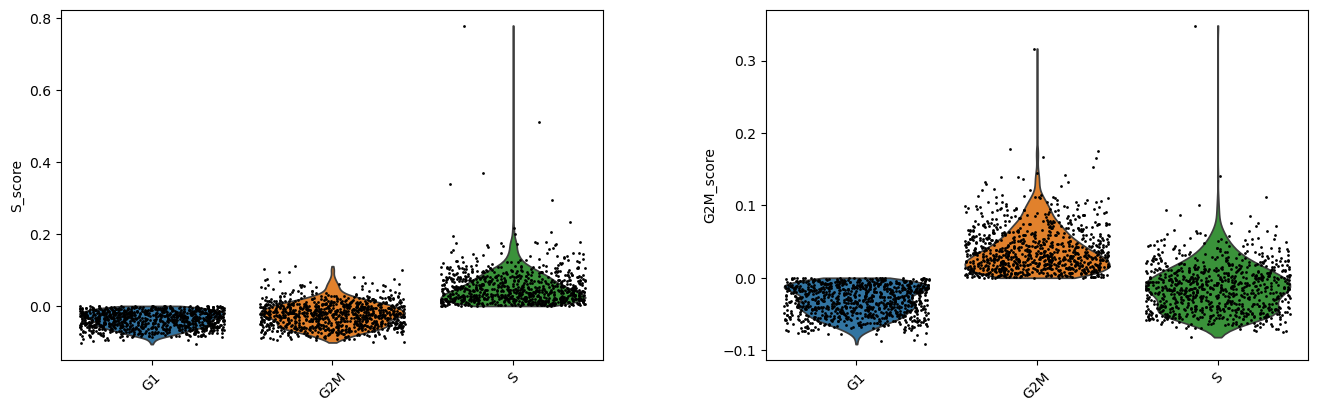

In [112]:
# Visualize the scores
sc.pl.violin(
    adata_filtered_qc,
    ['S_score', 'G2M_score'],
    groupby='phase',
    jitter=0.4,
    size=2,
    rotation=45
)

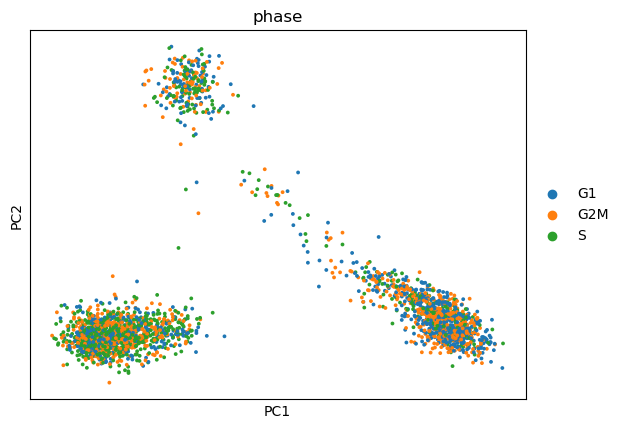

In [113]:
# Compute PCA on full dataset (or normalized/log1p counts)
sc.pp.pca(adata_filtered_qc, n_comps=20)
sc.pl.pca(adata_filtered_qc, color='phase', size=30)

###### So, PBMC 3k is a simple dataset (immune cells, in which S/G2M genes are not highly variable → they don’t drive major variation). Further clusters can make sense without obvious cell cycle-driven splitting

#### Higly variable genes

###### Most genes are rarely expressed, nearly constant across cells, or dominated by technical noise. Using all genes makes downstream analyses noisier and less efficient. Selecting highly variable genes (HVGs) focuses the analysis on genes that capture meaningful biological differences between cells. Number of HVGs is usually 2,000

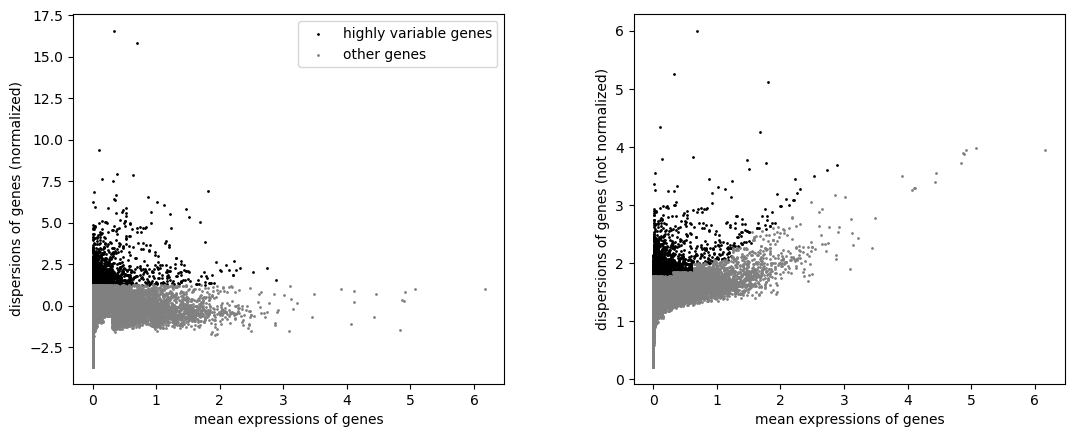

In [114]:
sc.pp.highly_variable_genes(
    adata_filtered_qc,
    n_top_genes=2000
)
# HVG plot
sc.pl.highly_variable_genes(adata_filtered_qc)

In [115]:
# Subset HVGs
adata_filtered_qc_hvg = adata_filtered_qc[:, adata_filtered_qc.var['highly_variable']].copy()
adata_filtered_qc_hvg.var.head()

,gene_ids,feature_types,MT,Ribosomal,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
FAM87B,ENSG00000177757,Gene Expression,False,False,1,0.000683,99.965859,2.0,True,0.002455,1.893460,1.625224
TNFRSF18,ENSG00000186891,Gene Expression,False,False,49,0.023558,98.327074,69.0,True,0.083901,1.878221,1.576956
CHD5,ENSG00000116254,Gene Expression,False,False,4,0.001366,99.863435,4.0,True,0.004807,1.915416,1.694769
ENSG00000271746,ENSG00000271746,Gene Expression,False,False,3,0.001707,99.897576,5.0,True,0.004464,1.906038,1.665063
PER3,ENSG00000049246,Gene Expression,False,False,129,0.055650,95.595766,163.0,True,0.168216,1.810127,1.361271


In [116]:
adata_filtered_qc_hvg

AnnData object with n_obs × n_vars = 2702 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_Ribosomal', 'pct_counts_Ribosomal', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids', 'feature_types', 'MT', 'Ribosomal', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'phase_colors', 'pca', 'hvg'
    obsm: 'X_pca'
    varm: 'PCs'

In [117]:
# Store raw log-normalized data (before scaling / regress_out)
adata_filtered_qc_hvg.raw = adata_filtered_qc_hvg

#### Regress out

##### Regressing out covariates is performed to ensure that downstream analyses are driven by biological variation rather than technical effects such as library size, mitochondrial or ribosomal content, or cell cycle activity

In [118]:
# Regress out technical and biological covariates
sc.pp.regress_out(
    adata_filtered_qc_hvg,
    ['total_counts', 'pct_counts_MT', 'pct_counts_Ribosomal', 'S_score', 'G2M_score']
)

#### Scaling

##### Scaling gene expression centers each gene to mean 0 and sets variance to 1 to ensure that all genes contribute equally to downstream analyses, preventing highly expressed genes from dominating PCA or clustering

In [119]:
# Scale gene expression
sc.pp.scale(adata_filtered_qc_hvg, max_value=10)

#### Btach effect correction 
##### When exploring the standard PBMC 3k dataset from 10x, the batch effect correction is not necessary because:
###### - Single donor
###### - Single library prep
###### - Single sequencing run
###### - Same chemistry

#### Principal component analysis

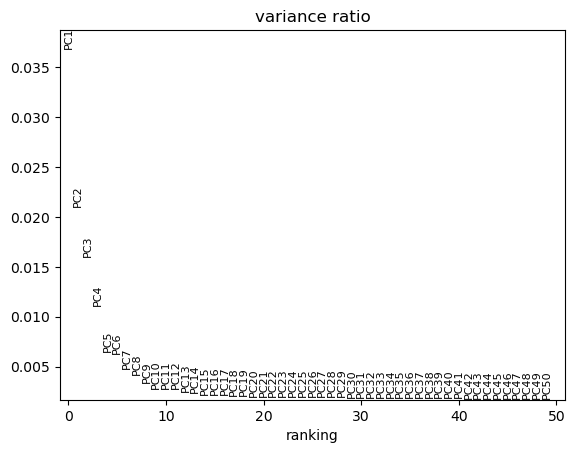

In [120]:
sc.tl.pca(adata_filtered_qc_hvg, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_filtered_qc_hvg, log=False, n_pcs=50)

In [121]:
# Take first 15 PCs to project them in 2-dimentional space
# Compute neighbors graph
sc.pp.neighbors(adata_filtered_qc_hvg, n_pcs=15)

#### Visualize clusteris using UMAP and t-SNE

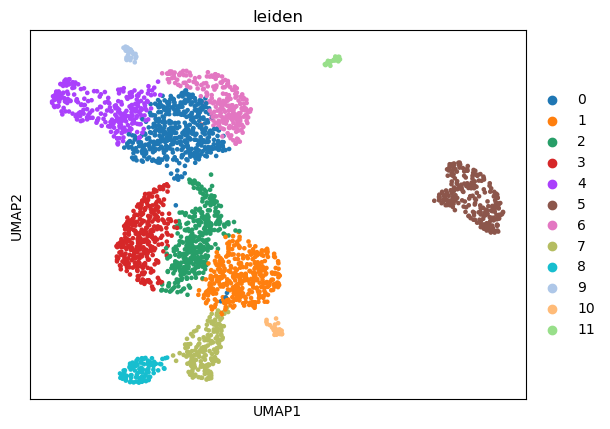

In [122]:
# Compute clusters
sc.tl.leiden(adata_filtered_qc_hvg, resolution=0.5)
# Compute UMAP embedding
sc.tl.umap(adata_filtered_qc_hvg)
# Plot UMAP colored by cluster
sc.pl.umap(adata_filtered_qc_hvg, color=['leiden'])

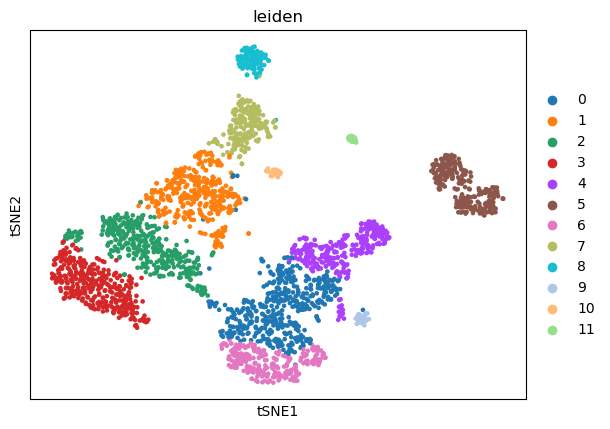

In [123]:
# Compute t-SNE coordinates (based on neighbors graph or PCA)
sc.tl.tsne(adata_filtered_qc_hvg, n_pcs=15, perplexity=30)
# Plot t-SNE
sc.pl.tsne(adata_filtered_qc_hvg, color=['leiden']) 

#### Find genetic markers / label cell types

In [131]:
sc.tl.rank_genes_groups(adata_filtered_qc_hvg, 'leiden', method='wilcoxon', use_raw=True)

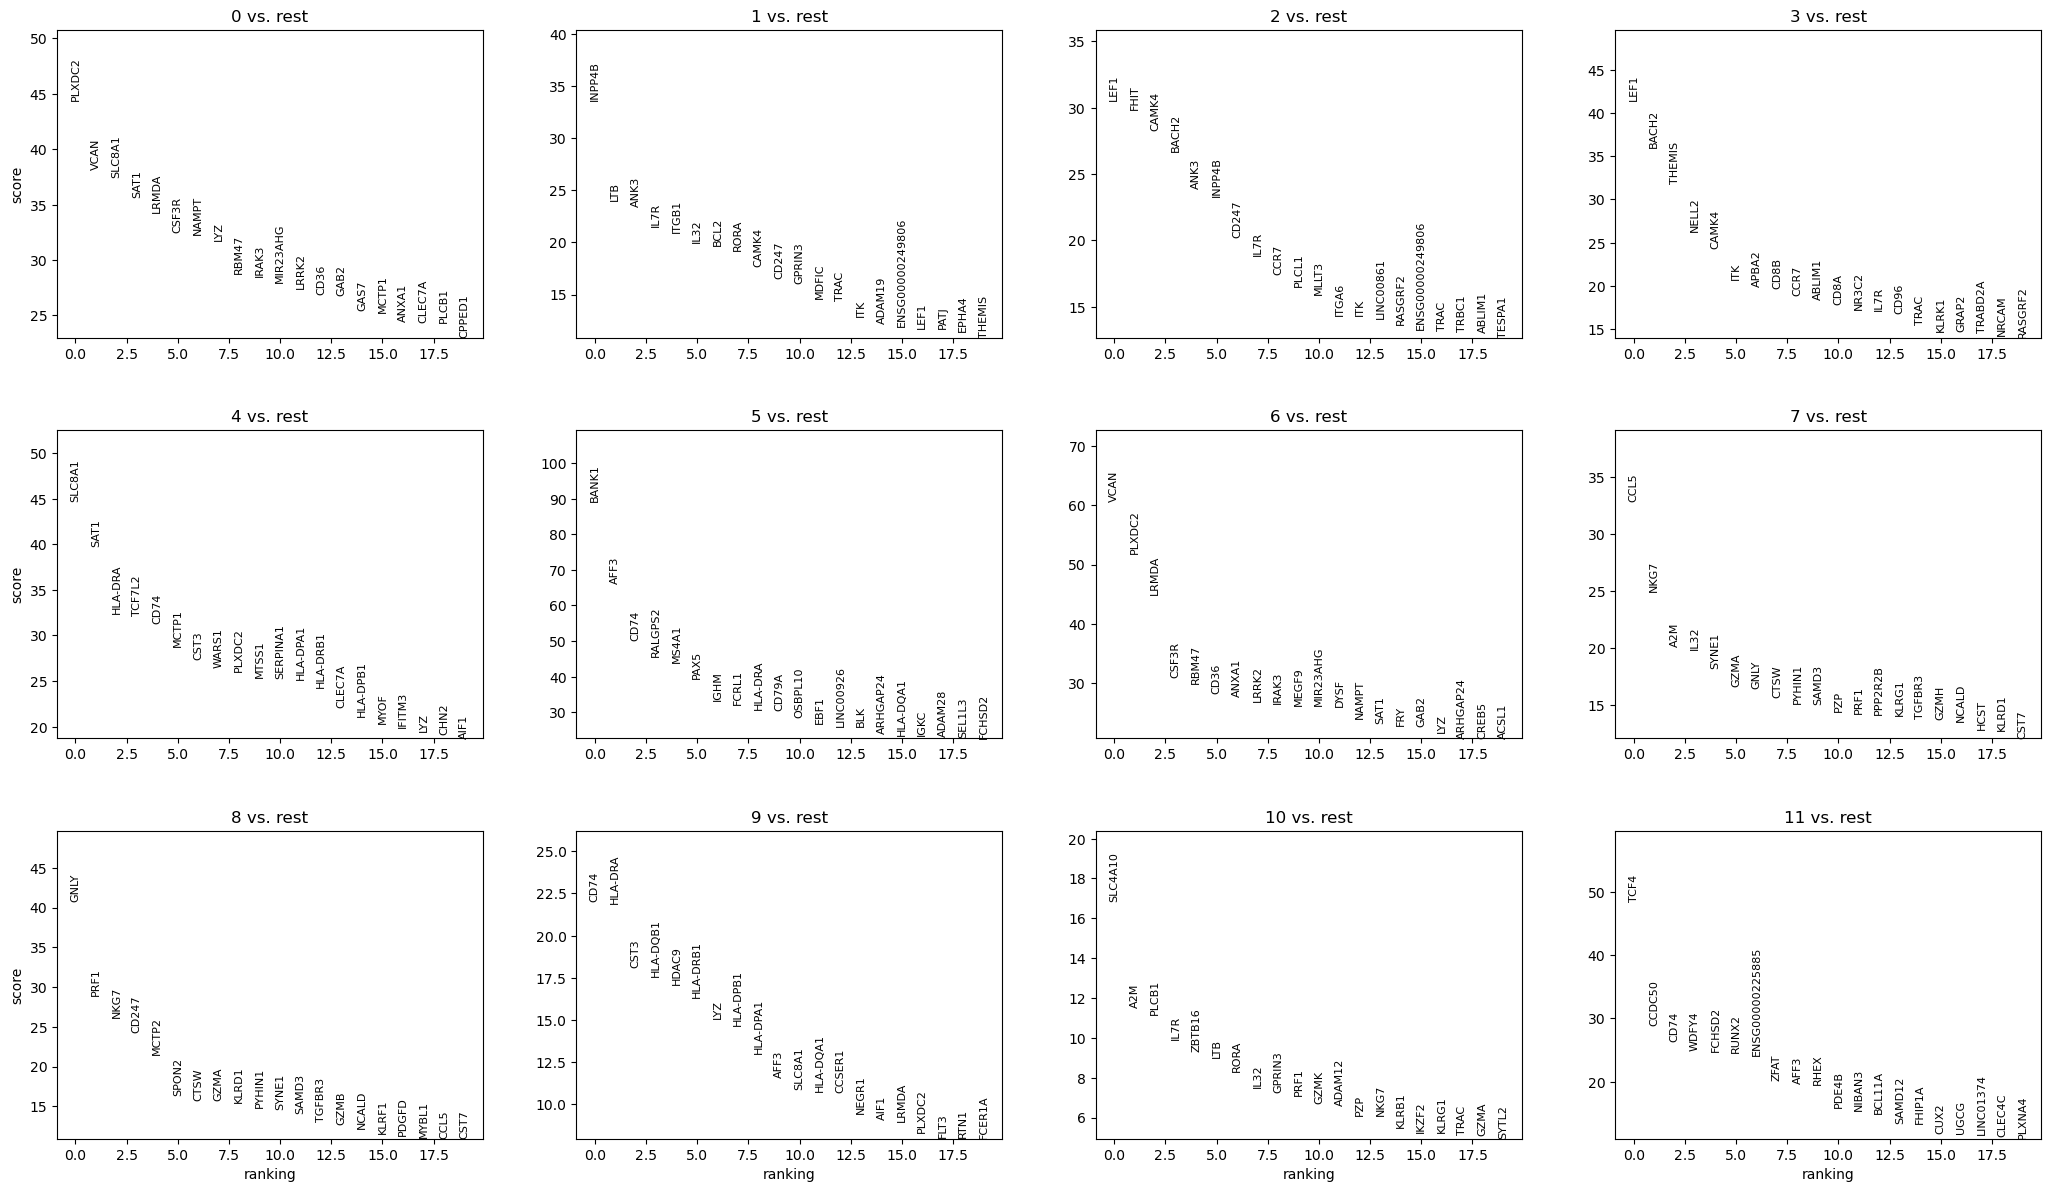

In [125]:
sc.pl.rank_genes_groups(adata_filtered_qc_hvg, n_genes = 20, sharey = False)

In [126]:
sc.get.rank_genes_groups_df(adata_filtered_qc_hvg, None).head(3)

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,PLXDC2,44.354343,4.017207,9.808056e-234,1.961611e-230
1,0,VCAN,38.204128,4.127989,1.879937e-179,6.266457e-177
2,0,SLC8A1,37.403763,3.811566,6.594240e-178,1.884069e-175


##### Retrieve top 5 genes per cell cluster 

In [142]:
top_markers_per_cluster = {}
for cluster in adata_filtered_qc_hvg.obs['leiden'].cat.categories:
    # Filter DataFrame for this cluster
    cluster_df = df[df['group'] == cluster]
    
    # Sort by score (or logfoldchange)
    cluster_df = cluster_df.sort_values('scores', ascending=False)
    
    # Take top 5 genes
    top_genes = cluster_df['names'].head(5).tolist()
    
    top_markers_per_cluster[cluster] = top_genes

# Check results
top_markers_per_cluster

{'0': ['PLXDC2', 'VCAN', 'SLC8A1', 'SAT1', 'LRMDA'],
 '1': ['INPP4B', 'LTB', 'ANK3', 'IL7R', 'ITGB1'],
 '2': ['LEF1', 'FHIT', 'CAMK4', 'BACH2', 'ANK3'],
 '3': ['LEF1', 'BACH2', 'THEMIS', 'NELL2', 'CAMK4'],
 '4': ['SLC8A1', 'SAT1', 'HLA-DRA', 'TCF7L2', 'CD74'],
 '5': ['BANK1', 'AFF3', 'CD74', 'RALGPS2', 'MS4A1'],
 '6': ['VCAN', 'PLXDC2', 'LRMDA', 'CSF3R', 'RBM47'],
 '7': ['CCL5', 'NKG7', 'A2M', 'IL32', 'SYNE1'],
 '8': ['GNLY', 'PRF1', 'NKG7', 'CD247', 'MCTP2'],
 '9': ['CD74', 'HLA-DRA', 'CST3', 'HLA-DQB1', 'HDAC9'],
 '10': ['SLC4A10', 'A2M', 'PLCB1', 'IL7R', 'ZBTB16'],
 '11': ['TCF4', 'CCDC50', 'CD74', 'WDFY4', 'FCHSD2']}

##### Create a dictionary with cell types based on gene markers (e. g. from Zheng et al., 2017, Nat. Commun. and PanglaoDB)

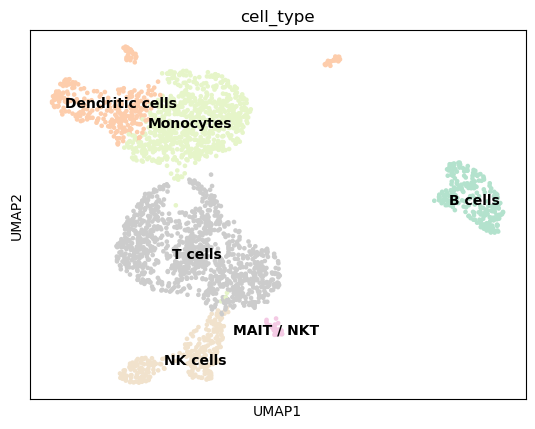

In [141]:
cluster_to_celltype = {
    '0': 'Monocytes',
    '1': 'T cells',
    '2': 'T cells',
    '3': 'T cells',
    '4': 'Dendritic cells',
    '5': 'B cells',
    '6': 'Monocytes',
    '7': 'NK cells',
    '8': 'NK cells',
    '9': 'Dendritic cells',
    '10': 'MAIT / NKT',
    '11': 'Dendritic cells'
}

adata_filtered_qc_hvg.obs['cell_type'] = adata_filtered_qc_hvg.obs['leiden'].map(cluster_to_celltype)

sc.pl.umap(adata_filtered_qc_hvg, color='cell_type', palette='Pastel2', legend_loc='on data')